In [471]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import pandas as pd
dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
dataset.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [472]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home'],
        [3.2, 0, 'Home'],
        [3.9, 0, 'Library'],
        [4.4, 0, 'Library'],
        [4.5, 5, 'Home'],
        [5.0, 1, 'Cafe'],
        [5.3, 2, 'Cafe'],
        [5.8, 0, 'Cafe'],
        [6.0, 3, 'Library'],
        [6.1, 1, 'Cafe'],
        [6.2, 1, 'Library'],
        [6.9, 4, 'Home'],
        [7.2, 2, 'Cafe'],
        [8.4, 1, 'Home'],
        [8.6, 1, 'Library'],
        [10.0, 0, 'Library']], dtype=object),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [473]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [2])],
    remainder='passthrough'
)
X_trans = ct.fit_transform(X) 
X_trans[:5], X[:5]

(array([[1.0, 0.0, 0.5, 3],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 1.8, 2],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 2.6, 2]], dtype=object),
 array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home']], dtype=object))

In [474]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

In [475]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [476]:
X_test, y_test

(array([[0.0, 1.0, 8.6, 1],
        [0.0, 1.0, 1.2, 4],
        [0.0, 1.0, 10.0, 0],
        [1.0, 0.0, 4.5, 5]], dtype=object),
 array([ 90,   8, 100,  38]))

In [477]:
X_test, reg.predict(X_test)

(array([[0.0, 1.0, 8.6, 1],
        [0.0, 1.0, 1.2, 4],
        [0.0, 1.0, 10.0, 0],
        [1.0, 0.0, 4.5, 5]], dtype=object),
 array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204]))

In [478]:
reg.coef_

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [479]:
m1 = reg.coef_[0] #집
m2 = reg.coef_[1] #도서관
m3 = 0 #카페
m4 = reg.coef_[2]
m5 = reg.coef_[3]
m1, m2, m3, m4, m5

(np.float64(-5.827128235666921),
 np.float64(-1.0445064705099227),
 0,
 np.float64(10.404195278045226),
 np.float64(-1.6420010360166126))

In [480]:
x =['집', '도서관', '카페', '공부시간', '결석횟수']
y =[m1, m2, m3, m4, m5]

plt.figure

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'ArrayLike | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

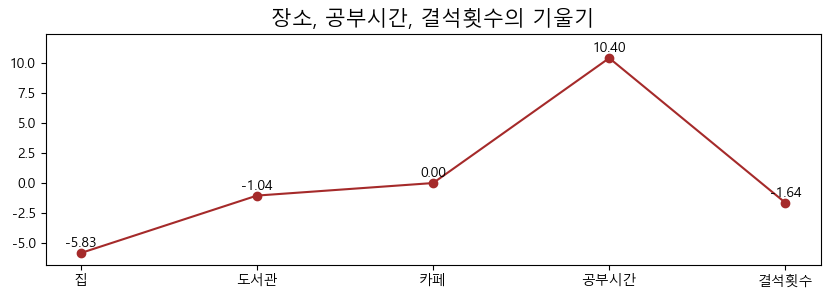

In [481]:
plt.figure(figsize=(10, 3))
plt.plot(x, y, marker='o', color='brown')
plt.title('장소, 공부시간, 결석횟수의 기울기', size=15)
plt.ylim(min(y)-1, max(y)+2)
for idx, m in enumerate(y):
    plt.text(idx, m+0.5, f'{m:.2f}', ha='center')
plt.show()

In [482]:
#카페에서 공부 9시간, 하루결석 점수는?
reg.predict([[0,0,9,1]])

array([97.36076317])

In [483]:
reg.predict([[0,1,9,1]])

array([96.3162567])

In [484]:
reg.predict([[1,0,9,1]])

array([91.53363494])

In [485]:
#다중선형회귀모델 생성 함수
def model_linear():
    import pandas as pd
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.model_selection import train_test_split
    
    dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    
    ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [2])],
    remainder='passthrough')
    X_trans = ct.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    return reg

In [486]:
model = model_linear()
model.predict([[1,0,9,1]]), reg.predict([[1,0,9,1]])

(array([91.53363494]), array([91.53363494]))

In [487]:
places = {'집':[1,0], '도서관':[0,1], '카페':[0,0]}
places['집']
places.get('도서관')

[0, 1]

In [488]:
place='도서관'
place = places.get(place)
place1 = place[0]
place2 = place[1]
hour=9
absent=1
model.predict([[place1, place2, hour, absent]])

array([96.3162567])

In [489]:
def predict(place, hour, absent):
    places = {'집':[1,0], '도서관':[0,1], '카페':[0,0]}
    p1 = places.get(place)[0]
    p2 = places.get(place)[1]
    model = model_linear()
    pred = predict = model.predict([[p1, p2, hour, absent]])
    print(f'장소:{place}, 공부시간:{hour}, 결석횟수:{absent}, 예상점수:{pred[0]:.2f}')

In [490]:
predict('카페', 3, 0)

장소:카페, 공부시간:3, 결석횟수:0, 예상점수:36.58


In [491]:
y_train

array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62])

In [492]:
df_y = pd.DataFrame(y_train)
df_y.columns=['실제점수']
df_y.head()

,실제점수
0,60
1,86
2,42
3,68
4,22


In [493]:
reg.predict(X_train)

array([57.22323961, 85.29111777, 44.89686182, 67.18859687, 23.30478412,
       20.80855613, 32.83130336, 67.18450992, 55.74398206, 50.09895946,
       76.99121064, 65.70933932, 30.33507537, -0.186027  , 64.75882175,
       61.8196688 ])

In [494]:
y_pred=reg.predict(X_train)
df_pred = pd.DataFrame(y_pred)
df_pred.columns=['예측점수']
df_pred.head()

,예측점수
0,57.223240
1,85.291118
2,44.896862
3,67.188597
4,23.304784


In [495]:
df_join = df_y.join(df_pred)
df_join.head()

,실제점수,예측점수
0,60,57.223240
1,86,85.291118
2,42,44.896862
3,68,67.188597
4,22,23.304784


In [496]:
df_x = pd.DataFrame(X_train)
df_x.columns=['장소1', '장소2', '공부시간', '결석횟수']
df_x.head()

,장소1,장소2,공부시간,결석횟수
0,0.0,0.0,5.3,2
1,1.0,0.0,8.4,1
2,0.0,1.0,3.9,0
3,0.0,0.0,6.1,1
4,1.0,0.0,2.6,2


In [497]:
df = df_x.join(df_join)
df['장소1'] = df['장소1'].astype(int)
df['장소2'] = df['장소2'].astype(int)
df.head()

,장소1,장소2,공부시간,결석횟수,실제점수,예측점수
0,0,0,5.3,2,60,57.223240
1,1,0,8.4,1,86,85.291118
2,0,1,3.9,0,42,44.896862
3,0,0,6.1,1,68,67.188597
4,1,0,2.6,2,22,23.304784


In [498]:
def place(x):
    x1 = x.iloc[0]
    x2 = x.iloc[1]
    if(x1==1) & (x2==0):
        return '집'
    elif(x1==0) & (x2==1):
        return '도서관'
    elif(x1==0) & (x2==0):
        return '카페'


In [499]:
df['장소'] = df[['장소1', '장소2']].apply(place, axis=1)
df.head()

,장소1,장소2,공부시간,결석횟수,실제점수,예측점수,장소
0,0,0,5.3,2,60,57.223240,카페
1,1,0,8.4,1,86,85.291118,집
2,0,1,3.9,0,42,44.896862,도서관
3,0,0,6.1,1,68,67.188597,카페
4,1,0,2.6,2,22,23.304784,집


In [500]:
xticks = [f'{df.loc[x,"장소"]}(시간:{df.loc[x,"공부시간"]}, 결석:{df.loc[x,"결석횟수"]})' for x in df.index]
xticks

['카페(시간:5.3, 결석:2)',
 '집(시간:8.4, 결석:1)',
 '도서관(시간:3.9, 결석:0)',
 '카페(시간:6.1, 결석:1)',
 '집(시간:2.6, 결석:2)',
 '카페(시간:1.8, 결석:2)',
 '집(시간:3.2, 결석:0)',
 '도서관(시간:6.2, 결석:1)',
 '카페(시간:5.0, 결석:1)',
 '도서관(시간:4.4, 결석:0)',
 '카페(시간:7.2, 결석:2)',
 '카페(시간:5.8, 결석:0)',
 '카페(시간:2.4, 결석:0)',
 '집(시간:0.5, 결석:3)',
 '집(시간:6.9, 결석:4)',
 '도서관(시간:6.0, 결석:3)']

<function matplotlib.pyplot.show(close=None, block=None)>

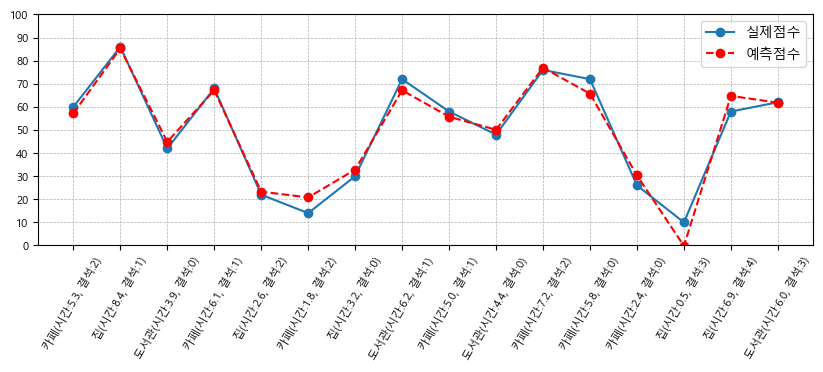

In [501]:
plt.figure(figsize=(10,3))
plt.plot(df.index, df['실제점수'], marker='o', label='실제점수')
plt.plot(df.index, df['예측점수'], marker='o', label='예측점수', ls='--', color='r')
xticks = [f'{df.loc[x,"장소"]}(시간:{df.loc[x,"공부시간"]}, 결석:{df.loc[x,"결석횟수"]})' for x in df.index]
plt.xticks(df.index, xticks, size=8, rotation=60)
plt.legend()
plt.grid(True, ls='--', lw=0.5)
plt.ylim(0, 100)
plt.yticks([y for y in range(0, 101, 10)], size=8)
plt.show

In [502]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import pandas as pd
dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
dataset.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [503]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X.shape, y.shape

((20, 3), (20,))

In [504]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [2])],
    remainder='passthrough'
)
X_trans = ct.fit_transform(X)
X_trans[:5], X[:5]

(array([[1.0, 0.0, 0.5, 3],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 1.8, 2],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 2.6, 2]], dtype=object),
 array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home']], dtype=object))

In [505]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_trans, y, test_size=0.2, random_state=0)
X_trans.shape, X_train.shape, X_test.shape

((20, 4), (16, 4), (4, 4))

In [506]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [507]:
y_pred = reg.predict(X_train)
y_pred, y_train

(array([57.22323961, 85.29111777, 44.89686182, 67.18859687, 23.30478412,
        20.80855613, 32.83130336, 67.18450992, 55.74398206, 50.09895946,
        76.99121064, 65.70933932, 30.33507537, -0.186027  , 64.75882175,
        61.8196688 ]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]))

In [508]:
y_pred = reg.predict(X_test)
y_pred, y_test

(array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204]),
 array([ 90,   8, 100,  38]))

In [509]:
reg.coef_, reg.intercept_

(array([-5.82712824, -1.04450647, 10.40419528, -1.64200104]),
 np.float64(5.3650067065447615))

In [510]:
X_train[0]

array([0.0, 0.0, 5.3, 2], dtype=object)

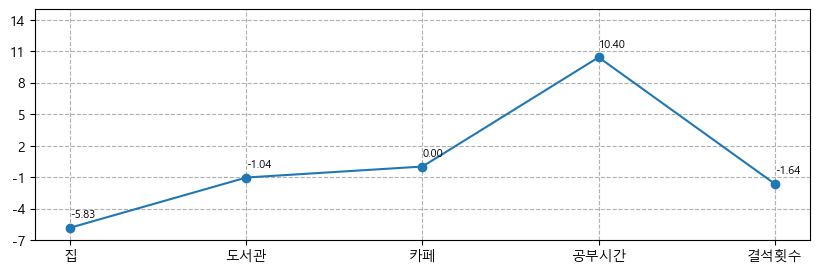

In [511]:

x=['집', '도서관', '카페', '공부시간', '결석횟수']
y=[reg.coef_[0], reg.coef_[1], 0, reg.coef_[2], reg.coef_[3]]
plt.figure(figsize=(10, 3))
plt.plot(x, y, marker='o')
plt.grid(True, ls='--')
for idx in range(len(x)):
    plt.text(idx, y[idx]+1, f'{y[idx]:.2f}', size=8)
plt.ylim(-7, 15)
plt.yticks([y for y in range(-7, 15, 3)])
plt.show()

In [512]:
def model_multi():
    import pandas as pd
    dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(drop='first'), [2])],
        remainder='passthrough'
    )
    X_trans = ct.fit_transform(X)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test=train_test_split(X_trans, y, test_size=0.2, random_state=0)

In [513]:
pred=model.predict([[1,0,9,1], [0,0,9,1]])
pred[0]

np.float64(91.53363493726826)

In [514]:
dict = {'집':[1,0], '도서관':[0,1], '카페':[0,0]}
place = '집'
p1 = dict.get(place)[0]
p2 = dict.get(place)[1]
p1, p2
hour=9
absent=1
model.predict([[p1, p2, hour, absent]])

array([91.53363494])

In [515]:
def predict(place, hour, absent):
    dict = {'집':[1,0], '도서관':[0,1], '카페':[0,0]}
    p1 = dict.get(place)[0]
    p2 = dict.get(place)[1]
    input_data = [[p1, p2, hour, absent]]  # 2차원 배열로 구성
    pred = model.predict(input_data)
    print(f'장소:{place}, 공부시간:{hour}, 결석횟수:{absent}, 예상점수:{pred[0]:.2f}점')



In [516]:
predict('집', 9, 1)

장소:집, 공부시간:9, 결석횟수:1, 예상점수:91.53점


In [517]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9623352565265527, 0.9859956178877446)

In [518]:
def place(x0, x1):
    dict = {'10':'집', '01':'도서관', '00':'카페'}
    x0 = int(x0)
    x1 = int(x1)
    x = f'{x0}{x1}'
    return dict[x]
place(0.0, 0.1)

'카페'

In [519]:
xticks = [f'{place(x[0], x[1])}, (시간{x[2]}, 결석횟수{x[3]})' for x in X_train]
xticks

['카페, (시간5.3, 결석횟수2)',
 '집, (시간8.4, 결석횟수1)',
 '도서관, (시간3.9, 결석횟수0)',
 '카페, (시간6.1, 결석횟수1)',
 '집, (시간2.6, 결석횟수2)',
 '카페, (시간1.8, 결석횟수2)',
 '집, (시간3.2, 결석횟수0)',
 '도서관, (시간6.2, 결석횟수1)',
 '카페, (시간5.0, 결석횟수1)',
 '도서관, (시간4.4, 결석횟수0)',
 '카페, (시간7.2, 결석횟수2)',
 '카페, (시간5.8, 결석횟수0)',
 '카페, (시간2.4, 결석횟수0)',
 '집, (시간0.5, 결석횟수3)',
 '집, (시간6.9, 결석횟수4)',
 '도서관, (시간6.0, 결석횟수3)']

<function matplotlib.pyplot.show(close=None, block=None)>

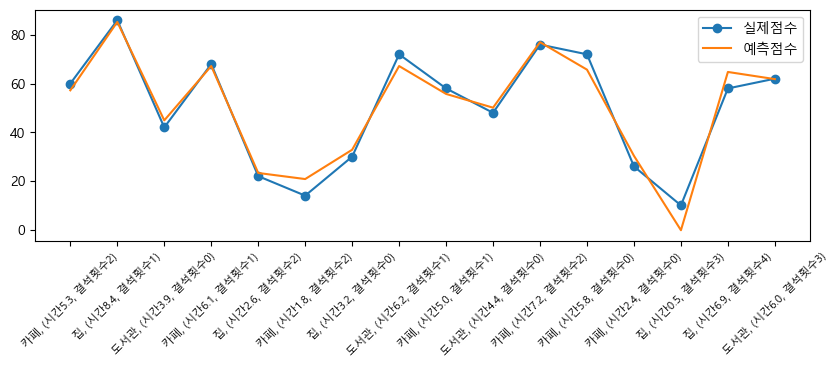

In [520]:
x = [idx for idx, x in enumerate(X_train)]
plt.figure(figsize=(10, 3))
plt.plot(x, y_train, marker='o', label='실제점수')
plt.plot(x, reg.predict(X_train), label='예측점수')
plt.legend()
plt.xticks(x, xticks, size=8, rotation=45) 
plt.show

In [521]:
df = pd.read_csv('data/다중선형회귀.csv')

In [522]:
X_df = df.iloc[:, 1:4].values
X_df[:1]

array([[10.0, 3, 'Home']], dtype=object)

In [523]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [2])],
    remainder='passthrough'
    )
X_trans = ct.fit_transform(X_df)

In [524]:
X_trans[:5]

array([[1.0, 0.0, 10.0, 3],
       [0.0, 1.0, 8.5, 4],
       [0.0, 0.0, 5.5, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2]], dtype=object)

In [525]:
y_pred = reg.predict(X_trans)
df_y = pd.DataFrame(y_pred)
df_y.head()

,0
0,98.653828
1,86.188156
2,59.304079
3,30.335075
4,23.304784


In [526]:
df

,name,hour,absent,place
0,홍길동,10.0,3,Home
1,심청이,8.5,4,Library
2,강감찬,5.5,2,Cafe
3,성춘향,2.4,0,Cafe
4,김길동,2.6,2,Home
5,이순신,3.2,0,Home
6,조인성,9.5,0,Library
7,송혜교,6.9,0,Library
8,송중기,4.5,5,Home
9,김혜수,9.7,1,Cafe


In [528]:
join = df.join(df_y)
join.rename(columns={0:'예측점수'})

,name,hour,absent,place,예측점수
0,홍길동,10.0,3,Home,98.653828
1,심청이,8.5,4,Library,86.188156
2,강감찬,5.5,2,Cafe,59.304079
3,성춘향,2.4,0,Cafe,30.335075
4,김길동,2.6,2,Home,23.304784
5,이순신,3.2,0,Home,32.831303
6,조인성,9.5,0,Library,103.160355
7,송혜교,6.9,0,Library,76.109448
8,송중기,4.5,5,Home,38.146752
9,김혜수,9.7,1,Cafe,104.643700
